## Skim lit :many-to-one classification *italicized text*
Input_shape=[none,embedding size]

output_shape=[5]

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct


fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign


dev.txt  test.txt  train.txt


In [ ]:
pip install --upgrade tensorflow


In [ ]:
data_dir="/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os

filenames=[data_dir+filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [ ]:
#Preprocess data
def get_lines(filename):
  with open(filename,"r") as f:
    return f.readlines()


In [ ]:
import numpy as np
train_lines=get_lines(filenames[1])
train_lines[:10]

['###24845963\n',
 'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .\n',
 'RESULTS\tA post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .\n',
 'RESULTS\tLiver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .\n',
 'RESULTS\tSurvival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .\n',
 "RESULTS\tThe percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .\n",
 'RE

In [ ]:
def preprocess_text_lines(filename):
  abstract_samples=[]
  abstract_lines=""
  input_lines=get_lines(filename)
  for line in input_lines:
    if line.startswith("###"):
      abstract_id=line
      abstract_lines=""
    elif line.isspace():
      abstract_line_split=abstract_lines.splitlines()
      for abstract_line_no,abstract_line in enumerate(abstract_line_split):
        line_data={}
        split_sentence=abstract_line.split("\t")
        label=split_sentence[0]
        sentence=split_sentence[1:]
        line_data["target"]=label
        line_data["text"]=str(sentence).lower()
        line_data["line_number"]=abstract_line_no
        line_data["total_lines"]=len(abstract_line_split)
        abstract_samples.append(line_data)
    else:
      abstract_lines+=line

  return abstract_samples

In [ ]:
train_samples=preprocess_text_lines(data_dir+"train.txt")
val_samples=preprocess_text_lines(data_dir+"dev.txt")
test_samples=preprocess_text_lines(data_dir+"test.txt")

In [ ]:
train_samples[:2]

[{'target': 'OBJECTIVE',
  'text': "['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .']",
  'line_number': 0,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': "['a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .']",
  'line_number': 1,
  'total_lines': 12}]

In [ ]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)

In [ ]:
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,['to investigate the efficacy of @ weeks of da...,0,12
1,METHODS,['a total of @ patients with primary knee oa w...,1,12
2,METHODS,['outcome measures included pain reduction and...,2,12
3,METHODS,['pain was assessed using the visual analog pa...,3,12
4,METHODS,['secondary outcome measures included the west...,4,12
...,...,...,...,...
180035,RESULTS,['for the absolute change in percent atheroma ...,7,12
180036,RESULTS,"['for pav , a significantly greater percentage...",8,12
180037,RESULTS,['both strategies had acceptable side effect p...,9,12
180038,CONCLUSIONS,"['compared with standard statin monotherapy , ...",10,12


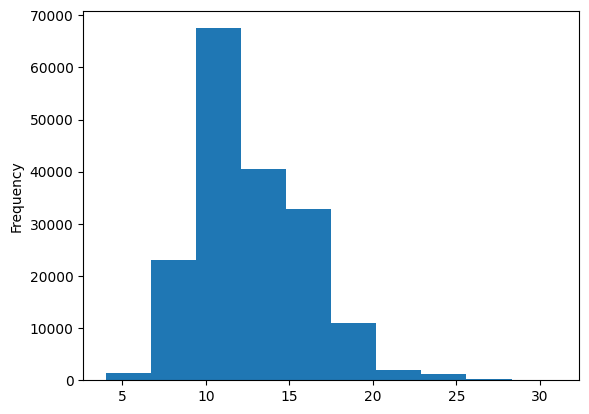

In [ ]:
train_df.total_lines.plot.hist();

In [ ]:
train_sentences=train_df["text"].tolist()
val_sentences=val_df["text"].tolist()
test_sentences=test_df["text"].tolist()

In [ ]:
train_sentences[:10]

["['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .']",
 "['a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .']",
 "['outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .']",
 "['pain was assessed using the visual analog pain scale ( @-@ mm ) .']",
 "['secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']",
 "['serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .'

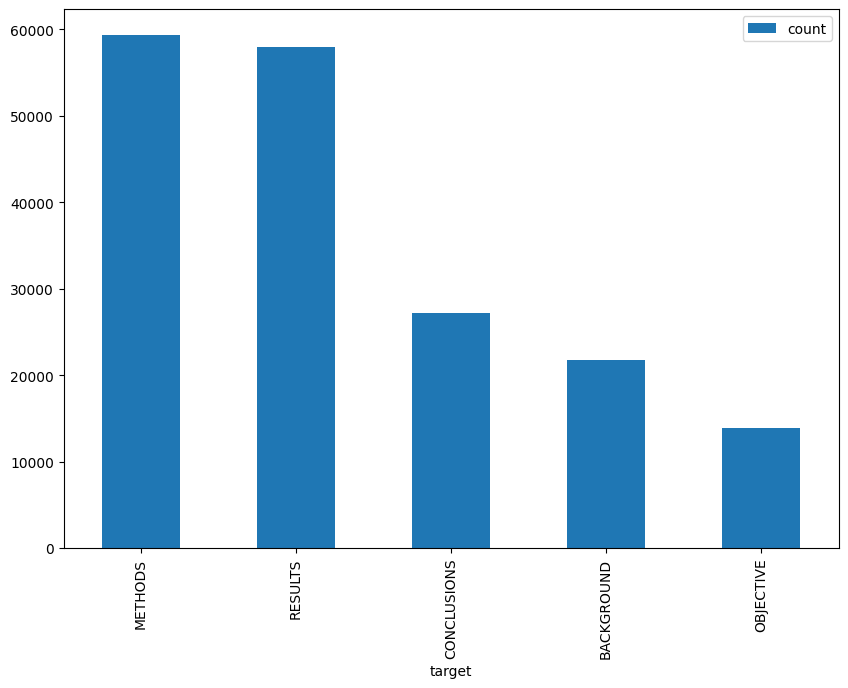

In [ ]:
#visualising the no of sentences per label
methods=train_df["target"].value_counts()
methods=methods.transpose()
plot=pd.DataFrame(methods).plot(kind="bar",figsize=(10,7))

#make numeric labels

make one hot encoder

In [ ]:
##making numeric labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(1,-1))
val_labels_one_hot=one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(1,-1))
test_labels_one_hot=one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(1,-1))
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(1, 180040), dtype=float64, numpy=array([[1., 1., 1., ..., 1., 1., 1.]])>

method 2 :encoding the labels

In [ ]:
##extract labels ("target columns ") and encode into integers
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()
train_labels_encoded=label_encode.fit_transform(train_df["target"].to_numpy())
val_labels_encoded=label_encode.fit_transform(val_df["target"].to_numpy())
test_labels_encoded=label_encode.fit_transform(test_df["target"].to_numpy())

In [ ]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
#get class name and no of classes fomr label encoder instance
num_classes=len(label_encode.classes_)
class_names=label_encode.classes_
num_classes,class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

#Model1: creating a baseline models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

baseline_model=Pipeline([("tfidf",TfidfVectorizer()),("clf",MultinomialNB())])
baseline_model.fit(train_sentences,train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_model.score(val_sentences,val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_preds=baseline_model.predict(val_sentences)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2024-08-12 01:37:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-12 01:37:39 (45.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results


# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results


{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## model 2 :conv1D token embeddings

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
sent_lens=[len(sentence.split()) for sentence in train_sentences]
avg_sent_len=np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

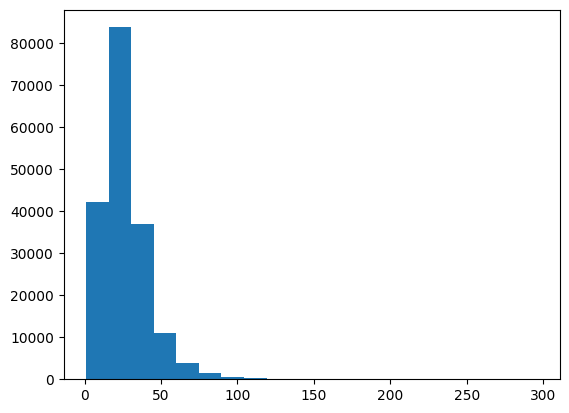

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20)

In [ ]:
#how long of a sentence length
output_seq_len=int(np.percentile(sent_lens,95))
output_seq_len

55

In [ ]:
from tensorflow.keras.layers import TextVectorization

MAX_VOCAB_SIZE=68000
text_vectorizer=TextVectorization(max_tokens=MAX_VOCAB_SIZE,output_sequence_length=output_seq_len,pad_to_max_tokens=True)

In [ ]:
#adapt to validation data
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
target_sentence=random.choice(train_sentences)
print(f"text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized tezt:{text_vectorizer([target_sentence])}")

text:
['this study aimed to determine the analgesic effect of topical application of benzocaine prior to lingual frenotomy in infants with symptomatic tongue-tie .']

Length of text: 23

Vectorized tezt:[[   23    17   447     6   228     2   950    70     4  1044   679     4
  16244   452     6  5346 26486     5   337     7   884 43522     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
rct_20k_text_vocab=text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"most common words in the vocab: {rct_20k_text_vocab[:5]}")
print(f"least common words in a vocab : {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']
least common words in a vocab : ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
#creating the embeddeing layer
embedding=layers.Embedding(input_dim=len(rct_20k_text_vocab),output_dim=128,mask_zero=True,input_length=output_seq_len)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
print(f"Sentence before vectorization: {target_sentence} \n")
print(f"Sentence after vectorization: {text_vectorizer([target_sentence])}")
print(f"Sentence after embedding: {embedding(text_vectorizer([target_sentence]))}")

Sentence before vectorization: ['this study aimed to determine the analgesic effect of topical application of benzocaine prior to lingual frenotomy in infants with symptomatic tongue-tie .'] 

Sentence after vectorization: [[   23    17   447     6   228     2   950    70     4  1044   679     4
  16244   452     6  5346 26486     5   337     7   884 43522     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]
Sentence after embedding: [[[ 0.04605414  0.04309518  0.03308243 ... -0.00859405  0.03558722
   -0.04742165]
  [-0.01591407  0.04253343 -0.03886529 ... -0.03402202 -0.03534962
   -0.03783147]
  [ 0.04285668 -0.00372324 -0.0015889  ... -0.02976415 -0.00566462
   -0.02545955]
  ...
  [ 0.02648785 -0.04532291 -0.00073533 ...  0.03899268 -0.03547945
   -0.0088295 ]
  [ 0.02648785 -0.04532291 -0.00073533 ...  0.03899268 -0.03547945
   -

In [ ]:
input=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(input)
x=embedding(x)
x=layers.Conv1D(filters=64,kernel_size=5,activation="relu",padding="same")(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_1=tf.keras.Model(input,outputs)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
model_1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_2                 │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,340,997 (31.82 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_encoded))
val_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_encoded))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_encoded))

In [ ]:
train_dataset=train_dataset.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
val_dataset=val_dataset.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
for x, y in val_dataset.take(1):
    print(f"x shape: {x.shape}, y shape: {y.shape}")
assert val_dataset is not None, "Validation dataset is None"


x shape: (32,), y shape: (32,)


In [ ]:
assert val_dataset is not None, "Validation dataset is None"


SyntaxError: expected 'else' after 'if' expression (<ipython-input-124-e1a6821ad6a1>, line 2)

In [ ]:
history_1=model_1.fit(train_dataset,steps_per_epoch=int(0.1*len(train_dataset)),epochs=3)

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.8563 - loss: 0.4213
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 59s 106ms/step - accuracy: 0.8908 - loss: 0.3242
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 70s 125ms/step - accuracy: 0.7728 - loss: 0.6487


In [ ]:
model_1.evaluate(val_dataset,steps=len(val_dataset))

945/945 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7776 - loss: 0.6220


[0.6273093819618225, 0.7774063348770142]

In [ ]:
model_1_pred_probs=model_1.predict(test_dataset)
model_1_pred_probs

942/942 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step


array([[1.6598739e-01, 1.7580425e-02, 5.9901983e-01, 1.9774655e-01,
        1.9665740e-02],
       [3.5107303e-03, 2.9834703e-04, 9.8065555e-01, 9.6723232e-03,
        5.8630090e-03],
       [3.0300196e-05, 8.5678745e-05, 9.9096543e-01, 2.5268420e-05,
        8.8933231e-03],
       ...,
       [1.6557912e-03, 2.5045834e-02, 4.8995201e-02, 1.5687717e-03,
        9.2273438e-01],
       [6.0497606e-03, 4.7665808e-02, 4.6429187e-02, 5.8680908e-03,
        8.9398718e-01],
       [2.4599092e-02, 2.5614095e-01, 4.3474269e-01, 4.6251148e-02,
        2.3826614e-01]], dtype=float32)

In [ ]:
model_1_probs=tf.argmax(model_1_pred_probs,axis=1)
model_1_probs

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 0, 3, ..., 4, 2, 1])>

In [ ]:
model_1_results=calculate_results(y_true=val_labels_encoded,y_pred=model_1_probs)
model_1_results

{'accuracy': 77.74063286111479,
 'precision': 0.7773674255962384,
 'recall': 0.7774063286111479,
 'f1': 0.7753493154862965}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
def use_embed(inputs):
  return use_embedding(inputs)
class embed_layer(layers.Layer):
  def call(self,inputs):
    return use_embed(inputs)

#Model 2:universal sentence encoder feature extractor model

In [ ]:
import tensorflow_hub as hub
use_embedding=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",input_shape=[],trainable=False,dtype="string",name="universal_encoder")


In [ ]:
import random
random_sentence=random.choice(train_sentences)
print(f"Random sentence:\n{random_sentence}\n")
use_embedded_sentence=use_embedding([random_sentence])
print(f"random sentence after use embeddings {use_embedded_sentence}")

Random sentence:
['the dash diet was designed to be rich in fruits , vegetables , whole grains , and low-fat dairy products and to be low in saturated fats , cholesterol , and refined grains .']

random sentence after use embeddings [[-0.04746024 -0.00024054 -0.03157791  0.0134706   0.02285944 -0.05412515
   0.03950066  0.04103656  0.04916893  0.00822918  0.02867821 -0.01613081
   0.04421329 -0.03858983 -0.07892826  0.04065829 -0.07859206 -0.04501968
   0.04453271  0.02032923  0.00266589  0.0192366  -0.02215705 -0.05671429
   0.04328976 -0.03846556  0.02328448  0.06716198 -0.01494646 -0.05416007
   0.06235102  0.07858503  0.03625593  0.03009985 -0.05288856 -0.00093694
  -0.0352327   0.02089133 -0.05326521  0.03008602 -0.00461983 -0.02210474
   0.07534821 -0.00267789 -0.00540055 -0.03158603 -0.04388521 -0.00493685
  -0.07562341 -0.07138933 -0.03520886 -0.0605874  -0.01157782  0.02572258
   0.02253184 -0.00109914  0.03600532 -0.00677091  0.05795953 -0.02533678
   0.03947737 -0.07158247  

In [ ]:

inputs=layers.Input(shape=[],dtype=tf.string)
#universal sentence encoder
x=embed_layer()(inputs)
x=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_2=tf.keras.Model(inputs,outputs)

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history_2=model_2.fit(train_dataset,steps_per_epoch=int(0.1*len(train_dataset)),validation_data=val_dataset,validation_steps=len(val_dataset),epochs=3)


Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.5571 - loss: 1.1523 - val_accuracy: 0.6895 - val_loss: 0.8105
Epoch 2/3
560/562 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6956 - loss: 0.7849

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
model_2.evaluate(val_dataset)

In [ ]:
model_2_preds_probs=model_2.predict(val_dataset)
model_2_preds_probs.shape

In [ ]:
model_2_preds=tf.argmax(model_2_preds_probs,axis=1)
model_2_preds

In [ ]:
model_2_results = calculate_results(y_true=val_labels_encoded, y_pred=model_2_preds)
model_2_results

#Model 3 : conv1d with character embeddings

In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
random_sentence

"['the dash diet was designed to be rich in fruits , vegetables , whole grains , and low-fat dairy products and to be low in saturated fats , cholesterol , and refined grains .']"

In [ ]:
val=split_chars(random_sentence)
val

"[ ' t h e   d a s h   d i e t   w a s   d e s i g n e d   t o   b e   r i c h   i n   f r u i t s   ,   v e g e t a b l e s   ,   w h o l e   g r a i n s   ,   a n d   l o w - f a t   d a i r y   p r o d u c t s   a n d   t o   b e   l o w   i n   s a t u r a t e d   f a t s   ,   c h o l e s t e r o l   ,   a n d   r e f i n e d   g r a i n s   . ' ]"

In [ ]:
train_chars=[split_chars(sentence) for sentence in train_sentences]
val_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]
train_chars[:3]

["[ ' t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   . ' ]",
 "[ ' a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   . ' ]",
 "[ ' o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o 

In [ ]:
#average character length?
char_lens=[len(sentence) for sentence in train_sentences]
mean_char_len=np.mean(char_lens)
mean_char_len

153.36626305265497

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([   5.        ,  202.85714286,  400.71428571,  598.57142857,
         796.42857143,  994.28571429, 1192.14285714, 1390.        ]),
 <BarContainer object of 7 artists>)

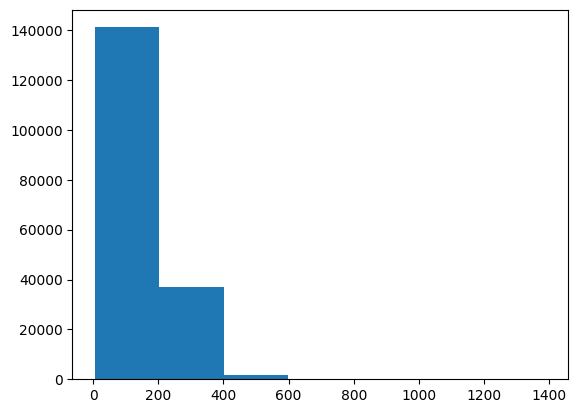

In [ ]:
import matplotlib.pyplot as plt
plt.hist(char_lens,bins=7)

In [ ]:
#95 percent of alphabets
output_seq_char_len=int(np.percentile(char_lens,95))
output_seq_char_len

294

In [ ]:
#get all keyboard characters
import string
alphabet=string.ascii_lowercase+string.digits
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789'

In [ ]:
#create char-level token vectorizer instance
NUM_CHAR_TOKENS=len(alphabet)+2 #add 2 for space and OOV token (out of vocab ,"[UNK]")
char_vectorizer =TextVectorization(max_tokens=NUM_CHAR_TOKENS,output_sequence_length=output_seq_char_len)

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab=char_vectorizer.get_vocabulary()
print(f"no of different characters in character vocab {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

no of different characters in character vocab 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
random_chars=random.choice(train_chars)
print(f"charified text:\n {random_chars}")
print(f"5 most common character  {char_vectorizer(random_chars)[:5]}")
print(f"5 least common character {char_vectorizer(random_chars)[-5:]}")

charified text:
 [ ' a g a i n   ,   t h e   e f f e c t   i n c r e a s e d   w i t h   m a t e r n a l   b m i   (   - @   ,   + @   ,   a n d   + @   g   ;   p - i n t e r a c t i o n   =   @   )   . ' ]
5 most common character  [ 5 18  5  4  6]
5 least common character [0 0 0 0 0]


In [ ]:
char_embed=layers.Embedding(input_dim=len(char_vocab),output_dim=25,mask_zero=True,input_length=output_seq_char_len,name="char_embed")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
print(f"charified text :\n {random_chars}")
char_embed_example=char_embed(char_vectorizer(random_chars))
print(f"embedded chars  after vectorization and embedding {char_embed_example}")
print(f"character embedding shape: {char_embed_example.shape}")

In [ ]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=char_vectorizer(inputs)
x=char_embed(x)
x=tf.keras.layers.Conv1D(filters=64,kernel_size=5,activation="relu",padding="same")(x)
x=tf.keras.layers.GlobalMaxPooling1D()(x)
outputs=tf.keras.layers.Dense(num_classes,activation="softmax")(x)
model_3=tf.keras.Model(inputs,outputs)

In [ ]:
train_chars_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_encoded))
val_chars_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_encoded))
test_chars_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_encoded))

In [ ]:
train_chars_dataset=train_chars_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_chars_dataset=test_chars_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_chars_dataset=val_chars_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_3.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
history_3=model_3.fit(train_chars_dataset,steps_per_epoch=int(0.1*len(train_chars_dataset)),validation_data=val_chars_dataset,validation_steps=len(val_chars_dataset),epochs=3)

In [ ]:
model_3_preds_probs=model_3.predict(val_chars)
model_3_preds_probs

In [ ]:
model_3_preds=tf.argmax(model_3_preds_probs,axis=1)

In [ ]:
model_3_results=calculate_results(y_true=val_labels_encoded,y_pred=model_3_preds)
model_3_results

#Model 4 : multi modal model

1.create a token-level embedding model \n
2.create  a character-level model \n
3.combine  1 and 2

In [ ]:
#setting up token inputs
token_inputs=layers.Input(shape=[],dtype=tf.string,name="token_inputs")
token_embeddings=use_embedding(token_inputs)
token_output=layers.Dense(128,activation="relu")(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,outputs=token_output)

#setting up character inputs/model
char_inputs=layers.Input(shape=(1,),dtype=tf.string,name="char_inputs")
x=char_vectorizer(char_inputs)
x=char_embed(x)
char_bi_lstm_output=layers.Bidirectional(layers.LSTM(24))(x)
char_model=tf.keras.Model(char_inputs,char_bi_lstm_output)
#concatenate token and char
token_char_concat=layers.Concatenate(name="concatenate_layer")([token_output,char_bi_lstm_output])

#create output layers -adding dropout ,discussed
combined_dropout=layers.Dropout(0.5,name="first_dropout")(token_char_concat)
combined_dense=layers.Dense(128,activation="relu")(combined_dropout)
final_droput=layers.Dropout(0.5,name="final_dropout")(combined_dense)
output_layer=layers.Dense(num_classes,activation="softmax")

model_4=tf.keras.Model(inputs=[token_model.input,char_model.input],outputs=output_layer(final_droput),name="model_4_token_char_embeddings")

In [ ]:
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = use_embedding(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_conv1d_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")


In [ ]:
model_conv1d_4.summary()

In [ ]:
#plot hybrid token and character model
from keras.utils import plot_model
plot_model(model_conv1d_4,show_shapes=True)

In [ ]:
model_conv1d_4.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
num_classes

In [ ]:
train_labels_one_hot.shape

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_encoded) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_encoded)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_data=tf.data.Dataset.from_tensor_slices((test_sentences,test_chars))
test_char_token_labels=tf.data.Dataset.from_tensor_slices((test_labels_encoded))
test_char_token_dataset=tf.data.Dataset.zip((test_char_token_data,test_char_token_labels))
test_char_token_dataset=test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_4_history = model_conv1d_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1*len(train_char_token_dataset)),epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))


In [ ]:
model_4_preds_probs=model_conv1d_4.predict(val_char_token_dataset)
model_4_preds_probs

In [ ]:
model_4_preds=tf.argmax(model_4_preds_probs,axis=1)
model_4_preds

In [ ]:
model_4_results=calculate_results(y_true=val_labels_encoded,y_pred=model_4_preds)
model_4_results

#Model 5:pretrained embedding +positional embeddings

In [ ]:
train_df

In [ ]:
##label sequence optimization layer
#ANY ENGINEER FEATURE SHOULD BE AVAILABLE AT RUNTIME

#input =seq of probability vectors from label predictionlayer
#outputs= seq of labels assigned to a token
df=pd.DataFrame(train_df["target"],train_df["line_number"])
df_2=df.groupby("target").get_group("OBJECTIVE")
print(df_2)

In [ ]:
#ANY ENGINEER FEATURE SHOULD BE AVAILABLE AT RUNTIME
train_df["line_number"].value_counts()

In [ ]:
#check distribution
train_df.line_number.plot(kind="hist");

In [ ]:
#one hot encoded
train_line_numbers_one_hot=tf.one_hot(train_df["line_number"].to_numpy(),depth=15)
val_line_numbers_one_hot=tf.one_hot(val_df["line_number"].to_numpy(),depth=15)
test_line_numbers_one_hot=tf.one_hot(test_df["line_number"].to_numpy(),depth=15)
train_line_numbers_one_hot[:10]


In [ ]:
line_no_percentile=np.percentile(train_df["line_number"],95)
print(line_no_percentile)


In [ ]:
train_df["total_lines"].value_counts()

In [ ]:
no=np.percentile(train_df["total_lines"],95)
print(no)
train_df.total_lines.plot(kind="hist")

In [ ]:
total_line_percentile=np.percentile(train_df["total_lines"],97)
total_line_percentile

In [ ]:
train_total_lines=tf.one_hot(train_df["total_lines"].to_numpy(),depth=total_line_percentile)
val_total_lines=tf.one_hot(val_df["total_lines"].to_numpy(),depth=total_line_percentile)
test_total_lines=tf.one_hot(test_df["total_lines"].to_numpy(),depth=total_line_percentile)


In [ ]:
train_line_numbers_one_hot[0].shape


In [ ]:
train_total_lines[0].shape

In [ ]:
###Building a tribrid model
token_input=layers.Input(shape=(),dtype=tf.string,name="token_input")
token_embeddings=use_embedding(token_input)
token_output=layers.Dense(128,activation="softmax")(token_embeddings)
token_model=tf.keras.Model(inputs=token_input,outputs=token_output)

#char model
char_input=layers.Input(shape=(1,),dtype=tf.string,name="char_input")
char_vectors=char_vectorizer(char_input)
char_embeddings=char_embed(char_vectors)
#bi directional lstm
char_output=layers.Bidirectional(layers.LSTM(32,activation="softmax"))(char_embeddings)
char_model=tf.keras.Model(inputs=char_input,outputs=char_output)

#positional embedding
line_number_input=layers.Input(shape=(15,),dtype=tf.int32,name="line_number_input")
#line_number_embeddings=layers.Embedding(input_dim=15,output_dim=128)(line_number_input)
line_number_output=tf.keras.layers.Dense(32,activation="relu")(line_number_input)
line_number_model=tf.keras.Model(inputs=line_number_input,outputs=line_number_output)

#total_lines
total_lines_input=layers.Input(shape=train_total_lines[0].shape,dtype=tf.int32,name="total_lines_input")
total_embeddings=layers.Dense(32,activation="relu")(total_lines_input)
total_line_model=tf.keras.Model(inputs=total_lines_input,outputs=total_embeddings)

#combine token and char embeddings
combined_embeddings=layers.Concatenate(name="concatenate",axis=1)([token_model.output,char_model.output])

z=layers.Dense(256,activation="relu")(combined_embeddings)
z=layers.Dropout(0.5)(z)
output_layer=layers.Dense(num_classes,activation="softmax")(z)

#TRIBRID EMBEDDINGS
tribrid_embeddings=layers.Concatenate(name="tribrid_embeddings")([line_number_model.output,total_line_model.output,z])
#create output layer
output_layer=layers.Dense(5,activation="softmax")(tribrid_embeddings)

In [ ]:
num_classes

In [ ]:
model_5=tf.keras.Model(inputs=[line_number_model.input,total_line_model.input,token_model.input,char_model.input],outputs=output_layer)

In [ ]:
from keras.utils import plot_model
plot_model(model_5,show_shapes=True)

What is label smoothing ?

if our model gets stuck on  a class it may get stuck on that class and not consider other classes

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
train_labels_encoded.shape

In [ ]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32) #prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32) #prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

Creating tribrid data

In [ ]:
model_5_history=model_5.fit(train_pos_char_token_dataset,steps_per_epoch=int(0.1*len(train_pos_char_token_dataset)),validation_data=val_pos_char_token_dataset ,validation_steps=int(0.1*len(val_pos_char_token_dataset )),epochs=3)

In [ ]:
model_5_pred_probs=model_5.predict(val_pos_char_token_dataset,verbose=1)
model_5_pred_probs

In [ ]:
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)

In [ ]:
model_5_results=calculate_results(y_true=val_labels_encoded,y_pred=model_5_preds)
model_5_results

In [ ]:
all_model_results=pd.DataFrame({"base_line":baseline_results,"model_1":model_1_results,"model_2":model_2_results,"model_3":model_3_results,"model_4":model_4_results,"model_5":model_5_results})
all_model_results=all_model_results.transpose()
all_model_results["accuracy"]=all_model_results["accuracy"]/100


In [ ]:
all_model_results.plot(kind="bar",fig=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

In [ ]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines,
                                                               test_sentences,
                                                               test_chars))
print(f"{len(test_pos_char_token_data)}")
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_encoded)
print(f"{len(test_labels_one_hot)}")

print(f"{len(test_pos_char_token_labels)}")
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32)#.prefetch(tf.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

In [ ]:
len(test_pos_char_token_dataset)

In [ ]:
test_pred_probs=model_5.predict(test_pos_char_token_dataset,verbose=1)
test_preds=tf.argmax(test_pred_probs,axis=1)
test_preds[:10]

In [ ]:
results=calculate_results(y_true=test_labels_encoded,y_pred=test_preds)
results